In [1]:
import tseriesRoutines as routines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import ceil, sqrt
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta
from keras import regularizers
from keras.constraints import max_norm, non_neg, unit_norm, min_max_norm
from keras.wrappers.scikit_learn import KerasRegressor


##########################################################################################
# RESULT REPRODUCIBILITY                                                                 #
##########################################################################################
import tensorflow as tf
import random as rn

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926
import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
rn.seed(42)

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed
tf.set_random_seed(42)
##########################################################################################

Using TensorFlow backend.


In [2]:
# DATA UNTUK TRAINING
# make connection to sqlite db
conn = sqlite3.connect('product.db')
c = conn.cursor()

# enable foreign keys
c.execute("PRAGMA foreign_keys = ON")
conn.commit()

In [3]:
# DATA UNTUK VALIDASI
# make connection to sqlite db
conn2 = sqlite3.connect('validasi.db')
c2 = conn2.cursor()

# enable foreign keys
c2.execute("PRAGMA foreign_keys = ON")
conn2.commit()

In [4]:
# import tseriesNN.py
import tseriesNN as tnn
# import validasiModelForecasting.py
import validasiModelForecasting as vmf

/usr/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


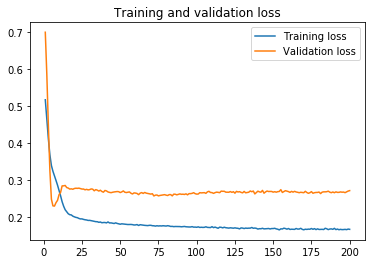

loss: 0.18508797264792634
val_loss: 0.2712356159445708


<Figure size 432x288 with 0 Axes>

In [21]:
# lag 2
product = tnn.genData('5aa2ad7735d6d34b0032a795', conn, c, impute=False, freq='daily')
X_train, y_train, X_test, y_test, dftrain, scaler = tnn.splitDataNN(product, percent=0, n_in=2, n_out=2)
mongoid = vmf.getTheRightID('5aa2ad7735d6d34b0032a795')
productval = routines.genDataVal(mongoid, conn2, c2, impute=False, freq='daily')
X_val, y_val, dftrainval, scalerval = vmf.splitDataNNVal(productval, n_in=2, n_out=2)
model = tnn.lstmModel(X_train, y_train, X_val, y_val, epochs=200, batch_size=8, 
                      units=4, drop=0.002, recdrop=0.002, plot=True)

In [22]:
model.model.save('./training/rebuilt/forecast_nn_5aa2ad7735d6d34b0032a795_NI_LSTM_lag2.h5')

In [23]:
vmf.evalForecastNN(model.model, X_val, y_val, inverse=True, scaler=scalerval)

Validasi RMSE: 0.62117
Validasi MAE: 0.54200


In [68]:
X_new = np.concatenate([X_train, X_val[0:31,:]])
y_new = np.concatenate([y_train, y_val[0:31]])
X_val1 = X_val[31:, :]
y_val1 = y_val[31:]
modelnew = tnn.lstmModel(X_new, y_new, X_val1, y_val1, epochs=200, batch_size=8, 
                         units=4, drop=0.002, recdrop=0.002, plot=False)
vmf.evalForecastNN(modelnew.model, X_val1, y_val1, inverse=True, scaler=scalerval)

Validasi RMSE: 0.54102
Validasi MAE: 0.44830


<Figure size 432x288 with 0 Axes>

In [69]:
X_new = np.concatenate([X_train, X_val[0:61,:]])
y_new = np.concatenate([y_train, y_val[0:61]])
X_val1 = X_val[61:, :]
y_val1 = y_val[61:]
modelnew = tnn.lstmModel(X_new, y_new, X_val1, y_val1, epochs=200, batch_size=8, 
                         units=4, drop=0.002, recdrop=0.002, plot=False)
vmf.evalForecastNN(modelnew.model, X_val1, y_val1, inverse=True, scaler=scalerval)

Validasi RMSE: 0.57988
Validasi MAE: 0.47074


<Figure size 432x288 with 0 Axes>

In [70]:
X_new = np.concatenate([X_train, X_val[0:91,:]])
y_new = np.concatenate([y_train, y_val[0:91]])
X_val1 = X_val[91:, :]
y_val1 = y_val[91:]
modelnew = tnn.lstmModel(X_new, y_new, X_val1, y_val1, epochs=200, batch_size=8, 
                         units=4, drop=0.002, recdrop=0.002, plot=False)
vmf.evalForecastNN(modelnew.model, X_val1, y_val1, inverse=True, scaler=scalerval)

Validasi RMSE: 0.63043
Validasi MAE: 0.53196


<Figure size 432x288 with 0 Axes>

In [66]:
X_val.shape

(115, 1, 9)

In [71]:
30/115

0.2608695652173913